## 2-3. 複数のグラフを一つの図にまとめて描画しよう！🎏（練習問題）

準備が整いました。  
matplotlibは複数のグラフを一つの画面に描画できるので、まとめて描画してみましょう。今回はちょうど20あるので、5行×4列に並べてみるなどすればきれいに収まるでしょうか（もちろん配置は自由に変えてOKです）。ワード等に貼り付けるときも個別の画像を貼るよりも1枚だけ貼るほうが簡単です。

**Hint!**
実際に全てのファイルを読み込もうとすると、エラーがでてくるかもしれません。この対処には**IF文**という機能を用いた例外処理を行うとうまく対処できるのではないでしょうか。

In [1]:
import os
import numpy as np

### おさらい・その①：データ読み込み関数

def readcsv(path_of_csv):
    f = open(path_of_csv)
    data_of_csv = f.read()
    data_of_csv = data_of_csv.split("\n") #改行コードで行分割
    head0 = data_of_csv[0]
    head1 = data_of_csv[1]
    body_ = data_of_csv[2:-1]
    body  = []
    for t in body_:
        t = t.split(",")
        body.append( t[1:] )
    f.close()
    body = np.array(body, dtype=float)
    return body

### おさらい・その②：自由なディレクトリ構造でのファイル取得

def getfiles(root):
    paths = []
    for curDir, dirs, files in os.walk(root):
        if len(files) > 0:
            for file in files:
                paths.append("/".join([curDir,file]))
    return paths

# 動作確認
paths = getfiles("_data/01_02_inputs")
for path in paths:
    data = readcsv(path)
    print(path, os.path.exists(path), data.shape, data[0,0], type(data[0,0]))

_data/01_02_inputs\2011.04.10送付/2011-04-06.csv True (24, 3) -1.0389010262617242 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付/2011-04-07.csv True (24, 3) 0.8266367792377435 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付/2011-04-08.csv True (24, 3) nan <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付/2011-04-09.csv True (24, 3) -0.9201146574323511 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付/2011-04-10.csv True (24, 3) 0.5910814580543601 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付\確認済み/2011-04-01.csv True (24, 3) 0.5667528768388364 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付\確認済み/2011-04-02.csv True (24, 3) 0.8999081788788418 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付\確認済み/2011-04-03.csv True (24, 3) 0.576899830971467 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付\確認済み/2011-04-04.csv True (24, 3) 0.2712153997821452 <class 'numpy.float64'>
_data/01_02_inputs\2011.04.10送付\確認済み/2011-04-05.csv True (24, 3) -0

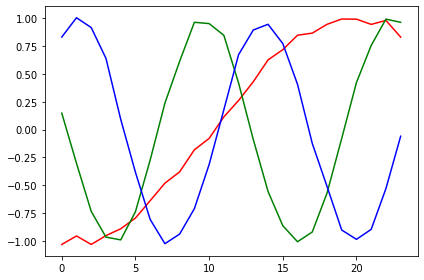

In [2]:
### 画像を並べるには①グラフ自体を並べて描画、②個別のグラフを画像で保存して画像を結合、くらいが考えられます
### 今回は①をやってみようと思います。
### 「.add_subplot()」を使います。とりあえず一つ書いてみるとこんな感じ。※他にもいろんな方法ありますよ！

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Agg')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[:,0], color=  "red", label="column0")
ax.plot(data[:,1], color="green", label="column1")
ax.plot(data[:,2], color= "blue", label="column2")
fig.tight_layout() 
plt.show()

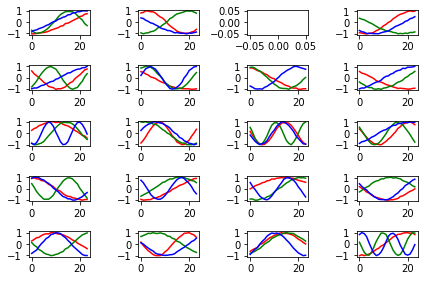

In [3]:
ny = 5 #行
nx = 4 #列
fig = plt.figure()
axs = []

paths = getfiles("_data/01_02_inputs")
for n,path in enumerate(paths):
    data = readcsv(path)
    axs.append( fig.add_subplot(ny, nx, n+1) )
    axs[-1].plot(data[:,0], color=  "red", label="column0")
    axs[-1].plot(data[:,1], color="green", label="column1")
    axs[-1].plot(data[:,2], color= "blue", label="column2")

fig.tight_layout() 
plt.show()

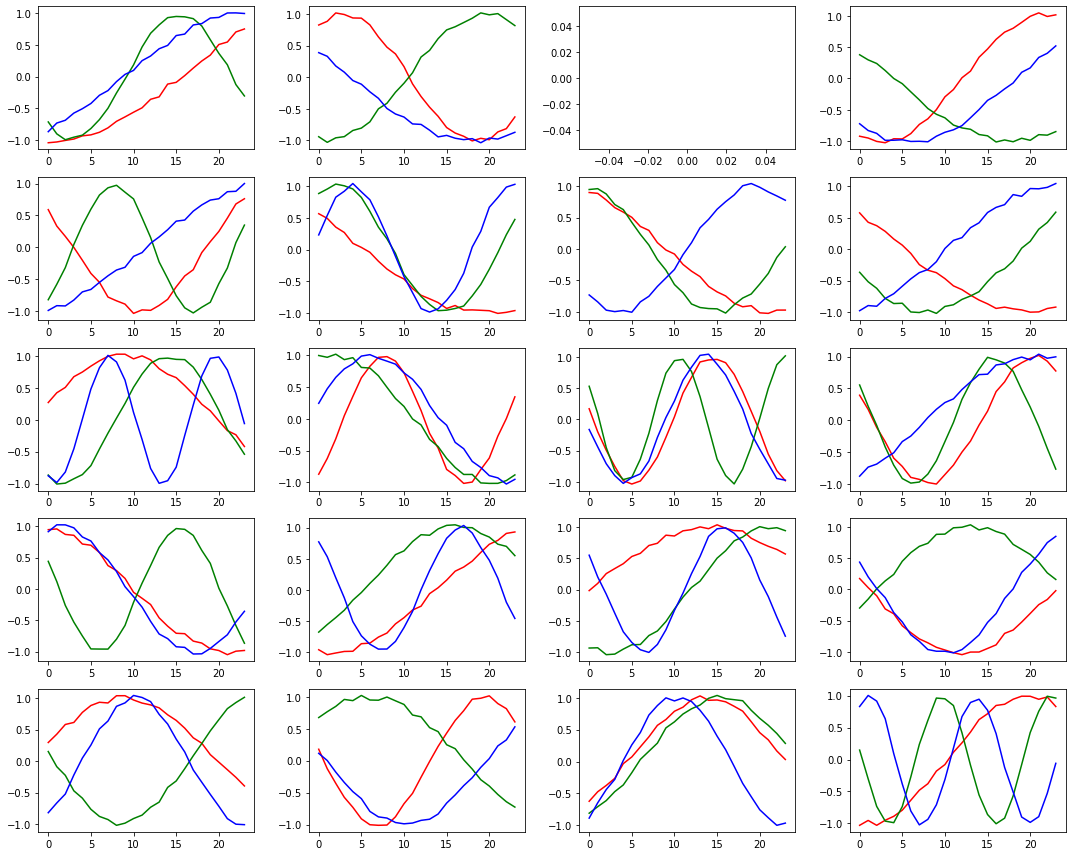

In [4]:
### ぐちゃっとなっているので、画像サイズを変えます。

ny = 5 #行
nx = 4 #列
fig = plt.figure(figsize=(15, 12))
axs = []

paths = getfiles("_data/01_02_inputs")
for n,path in enumerate(paths):
    data = readcsv(path)
    axs.append( fig.add_subplot(ny, nx, n+1) )
    axs[-1].plot(data[:,0], color=  "red", label="column0")
    axs[-1].plot(data[:,1], color="green", label="column1")
    axs[-1].plot(data[:,2], color= "blue", label="column2")

fig.tight_layout() 
plt.show()

In [5]:
### １行３列目のグラフが真っ白ですが、これは値が全て欠測（nan）のためです。
### 例外処理でこの箇所のグラフの描画をスキップしてみます。

### 値がどれくらい入っているかを調べた例は以下です。
for n,path in enumerate(paths):
    data = readcsv(path)
    print(n, np.sum(1.0 - np.isnan(data)))

0 72.0
1 72.0
2 0.0
3 72.0
4 72.0
5 72.0
6 72.0
7 72.0
8 72.0
9 72.0
10 72.0
11 72.0
12 72.0
13 72.0
14 72.0
15 72.0
16 72.0
17 72.0
18 72.0
19 72.0


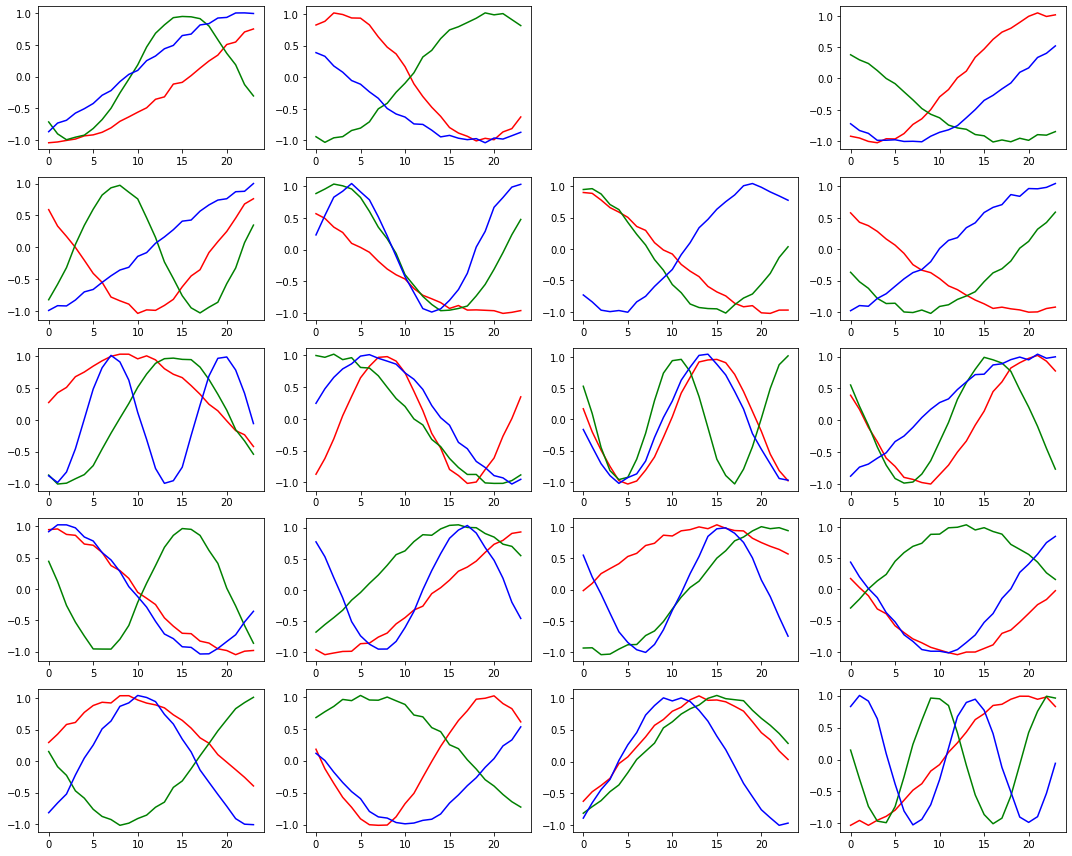

In [6]:
def is_exist(data):
    num = np.sum(1.0 - np.isnan(data))
    if num == 0.0:
        return False
    else:
        return True

ny = 5 #行
nx = 4 #列
fig = plt.figure(figsize=(15, 12))
axs = []

paths = getfiles("_data/01_02_inputs")
for n,path in enumerate(paths):
    data = readcsv(path)
    if is_exist(data):
        axs.append( fig.add_subplot(ny, nx, n+1) )
        axs[-1].plot(data[:,0], color=  "red", label="column0")
        axs[-1].plot(data[:,1], color="green", label="column1")
        axs[-1].plot(data[:,2], color= "blue", label="column2")

fig.tight_layout() 
plt.show()

他にも図のタイトルや凡例など、業務で扱うにはいろんなこまごまとした調整が必要と思いますが、ググっていけばたいていなんでも可能だと思います。